<a href="https://colab.research.google.com/github/Rahul2004Yadav/machine-learning/blob/main/dog-vs-cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:30<00:00, 34.6MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.5MB/s]


In [6]:
import zipfile
zip=zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip.extractall('/content')
zip.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
#GENERATORS
train_ds=keras.utils.image_dataset_from_directory(
directory='/content/train',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
directory='/content/test',labels='inferred',label_mode='int',batch_size=32,image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#normalize
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [10]:
# create cnn model
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.4359 - accuracy: 0.5810 - val_loss: 0.6422 - val_accuracy: 0.6376
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6344 - accuracy: 0.6513 - val_loss: 0.6342 - val_accuracy: 0.6294
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5967 - accuracy: 0.6957 - val_loss: 0.6642 - val_accuracy: 0.6102
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5707 - accuracy: 0.7192 - val_loss: 0.6392 - val_accuracy: 0.6432
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5293 - accuracy: 0.7420 - val_loss: 0.5935 - val_accuracy: 0.6828
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5018 - accuracy: 0.7624 - val_loss: 0.5876 - val_accuracy: 0.7462
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4870 - accuracy: 0.7761 - val_loss: 0.5002 - val_ac

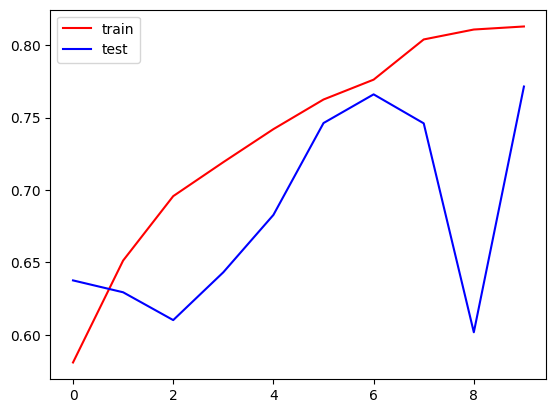

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')

plt.legend()
plt.show()

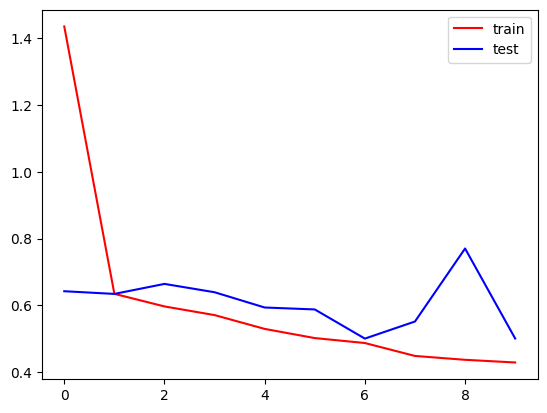

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')

plt.legend()
plt.show()

In [16]:
import cv2


In [71]:
test_img=cv2.imread('/content/ff2.jpg')

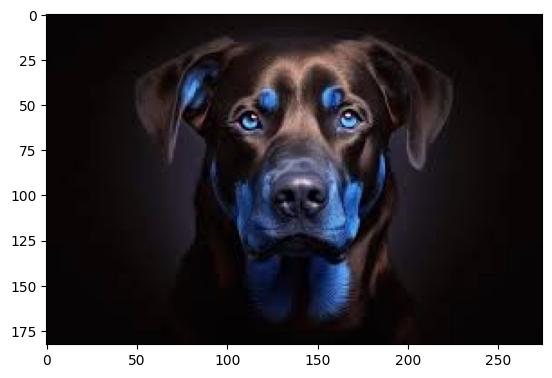

In [72]:
plt.imshow(test_img)

In [73]:
test_img.shape

(183, 275, 3)

In [74]:
test_img=cv2.resize(test_img,(256,256))


In [75]:
test_input=test_img.reshape(1,256,256,3)

In [76]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)